# Test

## Test load model

### CLIP T5

In [ ]:
import os
from cvlep.VLT5.param import Config

if "RANK" in os.environ and "WORLD_SIZE" in os.environ:  # torchrun launch
    rank = int(os.environ["RANK"])
    local_rank = int(os.environ["LOCAL_RANK"])
    world_size = int(os.environ["WORLD_SIZE"])
elif int(os.environ.get('SLURM_NPROCS', 1)) > 1:  # slurm launch
    rank = int(os.environ["SLURM_PROCID"])
    local_rank = int(os.environ["SLURM_LOCALID"])
    world_size = int(os.environ["SLURM_NPROCS"])
else:  # single gpu & process launch
    rank = 0
    local_rank = 0
    world_size = 0

config_encoder_question = "experiments/config_vladapter/local/encoder_simple_adapter.json"
config_encoder_passage = "experiments/config_vladapter/local/encoder_simple_adapter.json"
config_model = "experiments/config_vladapter/local/config_model.json"
config_training = "experiments/config_vladapter/local/training_simple_adapter.json"

# Training config
config_training = Config.load_json(config_training)
config_training.world_size = world_size
config_training.rank = rank
config_training.local_rank = local_rank
if world_size > 1:
    config_training.distributed = True
    config_training.multiGPU = True
else:
    config_training.distributed = False
    config_training.multiGPU = False

config_encoder_question = Config.load_json(config_encoder_question)
config_encoder_passage = Config.load_json(config_encoder_passage)
config_model = Config.load_json(config_model)
DPRDataset
from cvlep.trainer_base_vladapter import Trainer

trainer = Trainer(config_encoder_question,config_encoder_passage, config_model, config_training, train=False, local=True)

In [2]:
from torch import nn

a = nn.Linear(768, 10, bias= True)

NameError: name 'a' is not defined

In [25]:
from cvlep.trainer_base_vladapter import Trainer

trainer = Trainer(config_encoder_question,config_encoder_passage, config_model, config_training, train=False, local=True)

TypeError: add_code_sample_docstrings() got an unexpected keyword argument 'tokenizer_class'

In [9]:
a = trainer.model.image_passage_encoder.__str__()

In [11]:
print(a)

VLT5(
  (shared): Embedding(32200, 768)
  (encoder): JointEncoder(
    (embed_tokens): Embedding(32200, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
            (attn_adapter): AdapterController(
              (adapters): ModuleDict(
                (IR): Adapter(
                  (activation): Activations()
                  (down_sampler): Linear(in_features=768, out_features=96, bias=True)
                  (up_sampler): 

In [18]:
trainer.model.image_passage_encoder

TypeError: expected 1 arguments, got 0

#### VLT5 without adapter or prompt

In [ ]:
from cvlep.trainer_base_vladapter import Trainer



trainer_model = Trainer(config_encoder_question, config_encoder_passage,config_model, config_training)

In [3]:
for n, p in trainer_model.model.image_passage_encoder.named_parameters():
    if p.requires_grad==True:
        print(n)

#### Prompt config


In [ ]:
from cvlep.trainer_base_vladapter import Trainer

config_encoder_question = "experiments/config_vladapter/prompt/encoder_prompting.json"
config_encoder_passage = "experiments/config_vladapter/prompt/encoder_prompting.json"
config_training = "experiments/config_vladapter/prompt/training_prompt.json"

trainer_clipt5 = Trainer(config_encoder_question, config_encoder_passage, config_training)

In [3]:
for n, p in trainer_clipt5.model.image_passage_encoder.named_parameters():
    if p.requires_grad==True:
        print(n)

encoder.prompt_modules.prompts.IR.prefix_embedding.0.weight
encoder.prompt_modules.prompts.IR.prefix_embedding.1.weight
encoder.prompt_modules.prompts.IR.prefix_embedding.1.bias
encoder.prompt_modules.prompts.IR.prefix_embedding.3.weight
encoder.prompt_modules.prompts.IR.prefix_embedding.3.bias


#### Adapter config


In [ ]:
from cvlep.trainer_base_vladapter import Trainer

config_encoder_question = "experiments/config_vladapter/adapter_for_contrastive/encoder_simple_adapter.json"
config_encoder_passage = "experiments/config_vladapter/adapter_for_contrastive/encoder_simple_adapter.json"
config_training = "experiments/config_vladapter/adapter_for_contrastive/training_simple_adapter.json"

trainer_clipt5 = Trainer(config_encoder_question, config_encoder_passage, config_training)

In [ ]:
for n, p in trainer_clipt5.model.image_passage_encoder.named_parameters():
    if p.requires_grad==True:
        print(n)

## Test embedding

In [3]:
from datasets import load_from_disk, disable_caching
disable_caching()
path_dataset = "data_model/dataset/small_dataset"
dataset = load_from_disk(path_dataset)

In [4]:
import torch
from cvlep.utils import device
index = 1
item = dataset[1]
key_vision_features = "vlt5_features"
key_boxes = "vlt5_normalized_boxes"
key_text="input"
tokenizer = trainer_model.tokenizer_question

vision_features = torch.Tensor(item[key_vision_features]).to(device)
boxes = torch.Tensor(item[key_boxes]).to(device)
vision_features = torch.squeeze(vision_features, dim=1)
vis_inputs = (vision_features,boxes)
boxes = torch.squeeze(boxes, dim=2)
input_ids = tokenizer(
    item[key_text], return_tensors='pt', padding=True, truncation=True).input_ids.to(device)
return_pooled_output=True,
pool_strategy="avg"
print(input_ids.size())
print(vision_features.size())

torch.Size([1, 11])
torch.Size([1, 36, 2048])


In [6]:
output = trainer_model.embedding_question( input_ids = input_ids,
    vis_inputs = vis_inputs,
    pool_strategy = pool_strategy,
    return_pooled_output = return_pooled_output)

In [9]:
output.pooler_output.size()

torch.Size([1, 768])

In [7]:
trainer_model.model.image_passage_encoder.encoder.embed_tokens

Embedding(32200, 768)

In [15]:
trainer_model.encoder_question.encoder.forward(
    input_ids = input_ids,
    vis_inputs = vis_inputs,
    pool_strategy = pool_strategy,
    return_pooled_output = return_pooled_output
)

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.0044,  0.0702, -0.1362,  ..., -0.0093, -0.0669,  0.2152],
         [-0.3346, -0.0321, -0.2023,  ..., -0.0346, -0.2422,  0.1325],
         [-0.3988, -0.1186, -0.2928,  ..., -0.1005, -0.0245,  0.0725],
         ...,
         [ 0.0027,  0.0135,  0.0049,  ...,  0.0231, -0.0006, -0.0090],
         [ 0.0780, -0.0152,  0.0395,  ...,  0.0947,  0.0811,  0.1531],
         [ 0.0100,  0.0192,  0.0097,  ...,  0.0264, -0.0009, -0.0107]]]), pooler_output=tensor([[ 5.6648e-02, -7.1184e-02, -1.5301e-01, -3.6746e-02, -1.1649e-01,
          3.5650e-02,  4.6196e-02, -9.3280e-02, -1.2167e-01,  1.7649e-01,
         -1.1129e-01, -5.8460e-02,  9.5520e-02,  1.1314e-02,  4.1585e-02,
         -1.2416e-02, -1.0474e-01,  3.2099e-02,  6.2653e-02,  4.1071e-02,
          8.7517e-02, -2.3704e-01,  7.3841e-02, -1.6983e-01, -1.1024e-01,
          1.1043e-01, -8.2290e-02, -2.5255e-02, -3.4988e-01,  1.7297e-01,
          1.3527e-01,  2.0638e-01, -

In [8]:
from datasets import load_from_disk, disable_caching
disable_caching()
path_dataset = "data_model/dataset/small_dataset"
dataset = load_from_disk(path_dataset)

In [9]:
import torch
from cvlep.utils import device
index = 2
item = dataset[1]
key_vision_features = "vlt5_features"
key_boxes = "vlt5_normalized_boxes"
key_text="input"
tokenizer = trainer_clipt5.tokenizer_question

vision_features = torch.Tensor(item[key_vision_features]).to(device)
boxes = torch.Tensor(item[key_boxes]).to(device)
vision_features = torch.squeeze(vision_features, dim=1)
boxes = torch.squeeze(boxes, dim=1)
input_ids = tokenizer(
    item[key_text], return_tensors='pt', padding=True, truncation=True).input_ids.to(device)

In [12]:
output_encoder_vlt5 = trainer_vlt5.model.image_question_encoder.encoder.forward(
    input_ids = input_ids,
    vis_inputs=(vision_features,boxes)
)

In [13]:
output_encoder_clipT5 = trainer_clipt5.model.image_question_encoder.encoder.forward(
    input_ids=input_ids,
    vis_inputs=(vision_features,boxes)
)

In [19]:
output_encoder_vlt5[0]

tensor([[[-0.0044,  0.0702, -0.1362,  ..., -0.0093, -0.0669,  0.2152],
         [-0.3346, -0.0321, -0.2023,  ..., -0.0346, -0.2422,  0.1325],
         [-0.3988, -0.1186, -0.2928,  ..., -0.1005, -0.0245,  0.0725],
         ...,
         [ 0.0027,  0.0135,  0.0049,  ...,  0.0231, -0.0006, -0.0090],
         [ 0.0780, -0.0152,  0.0395,  ...,  0.0947,  0.0811,  0.1531],
         [ 0.0100,  0.0192,  0.0097,  ...,  0.0264, -0.0009, -0.0107]]],
       grad_fn=<MulBackward0>)

In [21]:
r = output_encoder_clipT5[0] == output_encoder_vlt5[0]
torch.equal(output_encoder_clipT5[0],output_encoder_vlt5[0])

True

## Test training step

In [1]:
from cvlep.trainer_base_vladapter import Trainer

config_encoder_question = "experiments/config_vladapter/model_only/args_vlt5_wo_adap.json"
config_encoder_passage = "experiments/config_vladapter/model_only/args_vlt5_wo_adap.json"
config_model = "experiments/config_vladapter/model_only/config_model.json"
config_training = "experiments/config_vladapter/model_only/training_vlt5.json"

trainer_model = Trainer(config_encoder_question, config_encoder_passage,config_model, config_training)

from datasets import load_from_disk, disable_caching
disable_caching()
path_dataset = "data_model/dataset/small_dataset"
dataset = load_from_disk(path_dataset)

/home/pgrimal/miniconda3/envs/cvlp/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of VLT5 were not initialized from the model checkpoint at data_model/t5_pretrained and are newly initialized: ['encoder.visual_embedding.feat_embedding.0.weight', 'encoder.visual_embedding.feat_embedding.0.bias', 'encoder.visual_embedding.feat_embedding.1.weight', 'encoder.visual_embedding.absolute_vis_pos_embedding.0.weight', 'encoder.visual_embedding.absolute_vis_pos_embedding.0.bias', 'encoder.visual_embedding.absolute_vis_pos_embedding.1.weight', 'encoder.visual_embedding.obj_order_embedding.weight', 'encoder.visual_embedding.img_order_embedding.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of VLT5 were not initialized f

Model loaded from  data_model/whole_model/vlt5/VLT5Epoch30.pth
_IncompatibleKeys(missing_keys=[], unexpected_keys=['encoder.visual_embedding.layer_norm.weight'])
Model loaded from  data_model/whole_model/vlt5/VLT5Epoch30.pth
_IncompatibleKeys(missing_keys=[], unexpected_keys=['encoder.visual_embedding.layer_norm.weight'])
Configurations
{'share_embedding': True, 'share_vis_embedding': True}


In [2]:
import torch
from cvlep.utils import device


def get_feat(item):
    key_vision_features = "vlt5_features"
    key_boxes = "vlt5_normalized_boxes"
    key_text="input"
    vision_features = torch.Tensor(item[key_vision_features])
    boxes = torch.Tensor(item[key_boxes])
    vision_features = torch.squeeze(vision_features, dim=0)
    boxes = torch.squeeze(boxes, dim=0)
    return {"text":item[key_text], "feats":vision_features, "boxes":boxes, "size":boxes.size()[0]}

B = 2
question1 = get_feat(dataset[0])
relevant1 = get_feat(dataset[0])   
irrelevant1 = get_feat(dataset[1])
question2 = get_feat(dataset[2])
relevant2 = get_feat(dataset[2])
irrelevant2 = get_feat(dataset[3])

item1 = {}
item1["question_text"] = question1["text"]
item1["passage_relevant_text"] = relevant1['text']
item1['passage_irrelevant_text'] = irrelevant1["text"]
item1["n_boxes_question"] = question1["size"]
item1["n_boxes_passage_relevant"] = relevant1["size"]
item1["n_boxes_passage_irrelevant"] = irrelevant1["size"]
item1["question_image_features"] = question1['feats']
item1["question_image_boxes"] = question1["boxes"]
item1["passage_relevant_image_features"]=relevant1["feats"]
item1["passage_relevant_image_boxes"]=relevant1["boxes"]
item1["passage_irrelevant_image_features"]=irrelevant1['feats']
item1["passage_irrelevant_image_boxes"]=irrelevant1["boxes"]

item2 = {}
item2["question_text"] = question2["text"]
item2["passage_relevant_text"] = relevant2['text']
item2['passage_irrelevant_text'] = irrelevant2["text"]
item2["n_boxes_question"] = question2["size"]
item2["n_boxes_passage_relevant"] = relevant2["size"]
item2["n_boxes_passage_irrelevant"] = irrelevant2["size"]
item2["question_image_features"] = question2['feats']
item2["question_image_boxes"] = question2["boxes"]
item2["passage_relevant_image_features"]=relevant2["feats"]
item2["passage_relevant_image_boxes"]=relevant2["boxes"]
item2["passage_irrelevant_image_features"]=irrelevant2['feats']
item2["passage_irrelevant_image_boxes"]=irrelevant2["boxes"]

batch = [item1, item2]

In [3]:
B = 2

tokenizer = trainer_model.tokenizer_question
V_L_question = max(item['n_boxes_question'] for item in batch)
V_L_context = max(max(item['n_boxes_passage_relevant'],
                    item['n_boxes_passage_irrelevant']) for item in batch)
feat_dim = batch[0]['question_image_features'].shape[-1]
# boxes are represented by 4 points
question_boxes = torch.zeros(B, V_L_question, 4, dtype=torch.float)
question_vis_feats = torch.zeros(
    B, V_L_question, feat_dim, dtype=torch.float)
relevant_boxes = torch.zeros(B, V_L_context, 4, dtype=torch.float)
relevant_vis_feats = torch.zeros(
    B, V_L_context, feat_dim, dtype=torch.float)
irrelevant_boxes = torch.zeros(
    B, V_L_context, 4, dtype=torch.float)
irrelevant_vis_feats = torch.zeros(
    B, V_L_context, feat_dim, dtype=torch.float)

relevant_text, irrelevant_text, question_text, labels = list(), list(), list(), list()
for i, item in enumerate(batch):
    # TODO: voir si besoin de changer gestion pour le text, car a un impact sur attention mask
    question_text.append(item['question_text'])
    relevant_text.append(item['passage_relevant_text'])
    irrelevant_text.append(item['passage_irrelevant_text'])
    if tokenizer:
        n_boxes_relevant = item['n_boxes_passage_relevant']
        n_boxes_irrelevant = item['n_boxes_passage_irrelevant']
        n_boxes_question = item['n_boxes_question']
        question_boxes[i,
                        :n_boxes_question] = item['question_image_boxes']
        question_vis_feats[i,
                            :n_boxes_question] = item['question_image_features']
        relevant_boxes[i,
                        :n_boxes_relevant] = item['passage_relevant_image_boxes']
        relevant_vis_feats[i,
                            :n_boxes_relevant] = item['passage_relevant_image_features']
        irrelevant_boxes[i,
                            :n_boxes_irrelevant] = item['passage_irrelevant_image_boxes']
        irrelevant_vis_feats[i,
                                :n_boxes_irrelevant] = item['passage_irrelevant_image_features']
    if item['passage_relevant_text'] is None:
        labels.append(-100)  # ignore index when computing the loss
    else:
        labels.append(i)

question_input = tokenizer(
    question_text, padding='max_length', truncation=True, return_tensors="pt")
context_input = tokenizer(
    relevant_text + irrelevant_text, padding='max_length', truncation=True, return_tensors="pt")
labels = torch.tensor(labels)
visual_feats_context = torch.concat(
    [relevant_vis_feats, irrelevant_vis_feats])
context_image_boxes = torch.concat(
    [relevant_boxes, irrelevant_boxes])
results = {
    "input_ids_question": question_input.input_ids,
    "attention_mask_question": question_input.attention_mask,
    "input_ids_context": context_input.input_ids,
    "attention_mask_context": context_input.attention_mask,
    "labels": labels,
    "visual_feats_question": question_vis_feats,
    "visual_feats_context": visual_feats_context,
    "question_image_boxes": question_boxes,
    "context_image_boxes": context_image_boxes
}

In [5]:
results['labels']

tensor([0, 1])

In [4]:
# loss doit être faible car on met exactement même embedding pour question 
# et relevant passage
trainer_model.model.train_step(results)

tensor(0.1641)

## Test gather

In [78]:
import torch
from torch import nn
loss_fct = nn.NLLLoss(reduction='mean')
batch1 ={
"labels": torch.tensor([0,1,2,3])
}
batch2 = {
"labels": torch.tensor([0,1,-100,3])
}
labels1 = batch1.pop('labels')
labels2 = batch2.pop('labels')
labels_gatherer = [labels1, labels2]
gatherers = zip(labels_gatherer)
labels_gatherer


[tensor([0, 1, 2, 3]), tensor([   0,    1, -100,    3])]

In [79]:
# N questions taille du batch
N = 4
# nombre relevant et irrelevant 1 et 1
global_labels = []
label_shift = 0
for i, (received_labels) in enumerate(gatherers):
    received_labels = received_labels[0]
    received_labels[received_labels!=-100] += label_shift
    label_shift += 4 * 2 # N * M
    global_labels.append(received_labels)
print(global_labels)


[tensor([0, 1, 2, 3]), tensor([   8,    9, -100,   11])]


exemple d'un batch de 1
```
| question1 | * [relevant1, irr1, relevant2, irr2]
| question2 |
```
label devra donc etre [0, 2]
ce qui explique le besoin du shift


In [26]:
global_labels

[]

## Test loss

In [80]:
from torch import nn

m = nn.LogSoftmax(dim=1)
loss = nn.NLLLoss()
# input is of size N x C = 3 x 5
input = torch.randn(3, 5, requires_grad=True)
# each element in target has to have 0 <= value < C
target = torch.tensor([1, 0, 4])
output = loss(m(input), target)
output.backward()
# 2D loss example (used, for example, with image inputs)
N, C = 5, 4
loss = nn.NLLLoss()
# input is of size N x C x height x width
data = torch.randn(N, 16, 10, 10)
conv = nn.Conv2d(16, C, (3, 3))
m = nn.LogSoftmax(dim=1)
# each element in target has to have 0 <= value < C
target = torch.empty(N, 8, 8, dtype=torch.long).random_(0, C)
output = loss(m(conv(data)), target)
output.backward()

In [81]:
output.item()

1.5051658153533936

## Test tqdm

In [92]:
import time
from tqdm import tqdm
loss = 10
for epoch in range(4):
    pbar = tqdm(total=2, ncols=120)
    for batch in range(2):
        loss *= 0.5
        time.sleep(1)
        desc_str = f' epoch {epoch} | Loss {loss}'
        pbar.set_description(desc_str)
        pbar.update(1)
    pbar.close()

 epoch 0 | Loss 2.5: 100%|████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.00s/it]
 epoch 1 | Loss 0.625: 100%|██████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.00s/it]
 epoch 2 | Loss 0.15625: 100%|████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.00s/it]
 epoch 3 | Loss 0.0390625: 100%|██████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.00s/it]


## Test Config

In [8]:
from cvlep.VLT5.param import Config
config = Config.load_json("experiments/config_vladapter/prompt/training_prompt.json")

In [9]:
config.rank = 'yes'

In [6]:
config.local = True

In [7]:
config.local

True

## Test sentence_transformers

https://huggingface.co/sentence-transformers/sentence-t5-base

https://github.com/UKPLab/sentence-transformers

In [1]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/sentence-t5-base")

/home/pgrimal/miniconda3/envs/cvlp/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
normalize = model.__getitem__(3)
dense = model.__getitem__(2)

In [23]:
dense.activation_function.__dir__()
# https://github.com/UKPLab/sentence-transformers/blob/46a149433fe9af0851f7fa6f9bf37b5ffa2c891c/sentence_transformers/models/Dense.py

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_backward_hooks',
 '_buffers',
 '_call_impl',
 '_forward_hooks',
 '_forward_pre_hooks',
 '_get_backward_hooks',
 '_get_name',
 '_is_full_backward_hook',
 '_load_from_state_dict',
 '_load_state_dict_pre_hooks',
 '_maybe_warn_non_full_backward_hook',
 '_modules',
 '_named_members',
 '_non_persistent_buffers_set',
 '_parameters',
 '_register_load_state_dict_pre_hook',
 '_register_state_dict_hook',
 '_replicate_for_data_parallel',
 '_save_to_state_dict',
 '_slow_forward',
 '_state_dict_hooks',
 '_version',
 'add_module',
 'apply',


In [18]:
normalize()

Normalize()

## TriviaQA

In [14]:
from datasets import load_dataset

dataset = load_dataset("PaulLerner/triviaqa_for_viquae")

Using custom data configuration PaulLerner--triviaqa_for_viquae-ab2ffed0dcbf3b5f
Reusing dataset parquet (/home/pgrimal/.cache/huggingface/datasets/PaulLerner___parquet/PaulLerner--triviaqa_for_viquae-ab2ffed0dcbf3b5f/0.0.0/0b6d5799bb726b24ad7fc7be720c170d8e497f575d02d47537de9a5bac074901)
100%|██████████| 4/4 [00:00<00:00, 172.60it/s]


In [15]:
dataset

DatasetDict({
    with_viquae_test: Dataset({
        features: ['id', 'input', 'meta', 'output'],
        num_rows: 1247
    })
    with_viquae_train: Dataset({
        features: ['id', 'input', 'meta', 'output'],
        num_rows: 1181
    })
    with_viquae_validation: Dataset({
        features: ['id', 'input', 'meta', 'output'],
        num_rows: 1234
    })
    without_viquae: Dataset({
        features: ['id', 'input', 'meta', 'output'],
        num_rows: 47000
    })
})

In [12]:
from datasets import load_from_disk

dataset_kilt = load_from_disk("/home/pgrimal/Documents/data_viquae/kilt_trivia")

In [13]:
dataset_kilt

Dataset({
    features: ['kilt_id', 'wikipedia_id', 'wikipedia_title', 'text', 'anchors', 'categories', 'wikidata_info', 'history'],
    num_rows: 5903530
})

## T5

In [40]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

tokenizer = T5Tokenizer.from_pretrained("t5-base")
model = T5ForConditionalGeneration.from_pretrained("t5-base")

In [42]:
print(model.config.task_specific_params.keys())

dict_keys(['summarization', 'translation_en_to_de', 'translation_en_to_fr', 'translation_en_to_ro'])


In [45]:
# inference
input_ids = tokenizer(
    "James Bond is a <extra_id_0> <extra_id_1>", return_tensors="pt"
).input_ids  # Batch size 1
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

British spy.


In [49]:
# inference
input_ids = tokenizer(
    "Titanic is a <extra_id_0> <extra_id_1>", return_tensors="pt"
).input_ids  # Batch size 1
outputs = model.generate(input_ids)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))

ship built in 1912.


## CLIP preprocessing

voir dans VL-T5/src/caption_clip_data.py

But : comprendre comment sont générés les features actuellement avec clip
Si bonne facon d'utiliser clip on laisse comme ça sinon on essaie de fournir juste un embedding d'image et pas plusieurs embedding en fonction des boxes

Fichier utilisé cvlep.CLIPT5.clip_prepro_feats

charger le modèle :

Dans VLT5 il y a cette fonction
```py
def vis_forward(self, batch, device):
    if hasattr(self, "vis_encoder"):
        # self.vis_encoder.eval() # freeze the batchnorm statistics
        images = batch["images"].to(device)

        if self.config.vis_pooling_output:
            _, vis_feats = self.vis_encoder(images)
        else:
            vis_feats, _ = self.vis_encoder(images)
        # vis_feats: (B, dim, L ** 0.5, L ** 0.5)
        B, L, D = vis_feats.shape
        vis_pos = torch.zeros(B, L, 4, dtype=vis_feats.dtype)

        batch["vis_feats"] = vis_feats
        batch["boxes"] = vis_pos
```

Voir ce que renvoie le modèle avec la fonction

```py
self.vis_encoder = get_vis_encoder(
        backbone=vis_encoder_type, 
        image_size=eval(self.args.image_size)[0],
        adapter_type=None,
    )
self.model.vis_encoder = self.vis_encoder
```

get_vis encoder dans vis_encoder.py

Use CLIP-ResNet50 for fair comparaison

format en entrée de vis_forward
regarder dans vlt5 cococaption T5

In [67]:
from cvlep.CLIPT5.vis_encoder import get_vis_encoder

In [68]:
model = get_vis_encoder(backbone='RN101', adapter_type=None, image_size=eval("(224,224)")[0])


/home/pgrimal/miniconda3/envs/cvlp2/lib/python3.7/site-packages/torchvision/transforms/transforms.py:333: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


In [70]:
torch.save(model.model.state_dict(),'data_model/clip/')

In [3]:
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize
from PIL import Image
import torch
from torchvision.transforms import (
    Compose, Resize, CenterCrop, ToTensor, Normalize, RandomCrop, RandomHorizontalFlip, RandomErasing
)
def _transform(n_px):
    return Compose([
        # PadToSquare(),
        Resize(n_px, interpolation=Image.Resampling.BICUBIC),
        CenterCrop(n_px),
        # MinMaxResize(*n_px),
        lambda image: image.convert("RGB"),
        ToTensor(),
        Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)),
    ])


def augmentation_transform(image_size):
    return Compose([
        Resize(image_size, interpolation=Image.Resampling.BICUBIC),
        RandomHorizontalFlip(),
        RandomCrop(image_size, padding=int(image_size[0]*0.0625), padding_mode='reflect'),
        lambda image: image.convert("RGB"),
        ToTensor(),
        Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)),
        RandomErasing(),
    ])


transform = _transform(eval("(224,224)")[0])
transform2 = augmentation_transform(eval("(224,224)"))

In [4]:
path = "/home/pgrimal/Documents/Projects/entity_image/data/Commons_wikimage/-%20Narcissus%20pseudonarcissus%2003%20-.jpg"
image = Image.open(path)

In [26]:
t = transform(image)
t2 = transform2(image)

In [6]:
print(t.shape)
print(t2.shape)

torch.Size([3, 224, 224])
torch.Size([3, 224, 224])


In [23]:
image1 = t.view(224,224,3)
image2 = t2.view(224,224,3)

In [9]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


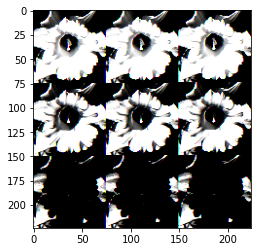

In [21]:
plt.imshow(image1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


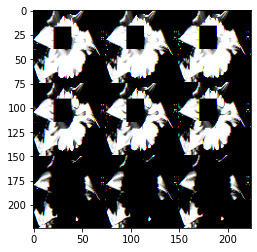

In [22]:
plt.imshow(image2)

In [144]:
n_boxes = 36 #self.args.n_boxes

In [27]:
# fake batch
t = torch.unsqueeze(t, dim=0)
t.shape

torch.Size([1, 3, 224, 224])

In [28]:
output = model(t)

In [29]:
_, pooling_output = output
output_normal, _ = output

print("pooling", pooling_output.shape)
print("output classic", output_normal.shape)

pooling torch.Size([1, 1, 512])
output classic torch.Size([1, 49, 2048])


In [148]:
output_normal[:,0,:].shape

torch.Size([1, 2048])

RuntimeError: Sizes of tensors must match except in dimension 0. Expected size 25 but got size 24 for tensor number 1 in the list.

In [30]:
# cas pooling
B, L, D = pooling_output.shape
vis_pos = torch.zeros(B, L, 4, dtype=pooling_output.dtype)

batch = {}
batch["vis_feats"] = pooling_output
batch["boxes"] = vis_pos



In [45]:
# cas non pooling
B, L, D = output_normal.shape
vis_pos = torch.zeros(B, L, 4, dtype=output_normal.dtype)
batch = {}
batch["vis_feats"] = output_normal
batch["boxes"] = vis_pos
print(vis_pos.shape)
print(output_normal.shape)
# on coonsidère dans ce cas qu'on utilise 49 images ?
# multiplier les features

torch.Size([1, 49, 4])
torch.Size([1, 49, 2048])


In [ ]:
# clip
COCO_test2015_000000550459.h5
train-1272-0-img1.h5

### Try to follow the process

In [46]:
vis_inputs = (batch['vis_feats'], batch['boxes'])
sqrt_size = int(36**0.5)
output_size = (sqrt_size, sqrt_size)
output_size

(6, 6)

In [48]:
def downsample(inputs):
        pool = torch.nn.AdaptiveMaxPool2d(6) # racine de 36
        B, L, t = transform(image)
dim = inputs.shape
        print(inputs.shape)
        inputs = inputs.permute(0, 2, 1) # (2B, dim, L/2)
        print(inputs.shape)
        sqrt_L = int(L ** 0.5)
        inputs = inputs.reshape(B, dim, sqrt_L, sqrt_L)
        print(inputs.shape)
        inputs = pool(inputs)
        print(inputs.shape)
        inputs = inputs.reshape(B, dim, -1)
        print(inputs.shape)
        inputs = inputs.permute(0, 2, 1)
        print(inputs.shape)
        return inputs

inputs_tuple = vis_inputs
inputs, boxes = inputs_tuple

inputs = downsample(inputs)
boxes = boxes[:, :inputs.shape[1]] # Get the first few data because the element are all zeros
print('boxes : ',boxes.shape)
outputs_tuple = (inputs, boxes)

torch.Size([1, 49, 2048])
torch.Size([1, 2048, 49])
torch.Size([1, 2048, 7, 7])
torch.Size([1, 2048, 6, 6])
torch.Size([1, 2048, 36])
torch.Size([1, 36, 2048])
boxes :  torch.Size([1, 36, 4])


In [51]:
def get_area(pos):
    height = pos[:, :, 3] - pos[:, :, 2]
    width = pos[:, :, 1] - pos[:, :, 0]
    area = height * width
    return area



area = get_area(boxes).unsqueeze(2) # [B, N, 1]
pos = torch.cat([boxes, area], dim=2) # [B, N, 5]
print("area", area.shape)
print("pos", pos.shape)

area torch.Size([1, 36, 1])
pos torch.Size([1, 36, 5])


In [54]:
pos

tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
        

In [126]:
boxes = torch.cat(torch.chunk(boxes[:,:36,:], 2, 1), 0)
boxes = boxes[:, :output_normal.shape[1]//2]
boxes = torch.cat(torch.chunk(boxes, 2, 0), 1)
print(boxes.shape)
36**0.5

torch.Size([2, 18, 4])


6.0

choix des dimensions en entré en utilisant commentaire (même si on ne veut vraiment se comparer car pas même tâche)

Par exemple pooling pas forcémenet intéressant pour nous de le faire
on peut peut être mieux comprendre l'image même si on risque de s'y perdre

pour une faire comparaison vaut peut être mieux utiliser pooling (même dimension pour clip)

```
Input images are resized to 224 × 224
for the memory efficiency. We extract the 7 × 7 grid fea-
tures produced by the last convolutional layer, and then ap-
ply adaptive maximum-pooling over the features for down-
sampling then to 6 × 6 for a fair comparison to [7].
```

Dans leur cas n'utilise pas la dernière couche

Même si on pourrait nous essayer de l'utiliser car peut être suffisant
Peut être essayer les deux avec et sans pooling

In [ ]:
# dans caption_raw_data.py
# get item
out_dict["image"] = self.transform(image)

out_dict['n_boxes'] = self.args.n_boxes

# collate fn
n_boxes = entry['n_boxes']
images.append(entry['image'])

batch_entry['images'] = torch.stack(images)
# Mais ne retourne pas n_boxes donc juste batch images


## batch embedding image

In [55]:
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize
from PIL import Image
import torch
from torchvision.transforms import (
    Compose, Resize, CenterCrop, ToTensor, Normalize, RandomCrop, RandomHorizontalFlip, RandomErasing
)
def _transform(n_px):
    return Compose([
        # PadToSquare(),
        Resize(n_px, interpolation=Image.Resampling.BICUBIC),
        CenterCrop(n_px),
        # MinMaxResize(*n_px),
        lambda image: image.convert("RGB"),
        ToTensor(),
        Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)),
    ])


def augmentation_transform(image_size):
    return Compose([
        Resize(image_size, interpolation=Image.Resampling.BICUBIC),
        RandomHorizontalFlip(),
        RandomCrop(image_size, padding=int(image_size[0]*0.0625), padding_mode='reflect'),
        lambda image: image.convert("RGB"),
        ToTensor(),
        Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)),
        RandomErasing(),
    ])


transform = _transform(eval("(224,224)")[0])
transform2 = augmentation_transform(eval("(224,224)"))

path = "/home/pgrimal/Documents/Projects/entity_image/data/Commons_wikimage/-%20Narcissus%20pseudonarcissus%2003%20-.jpg"
image = Image.open(path)

/home/pgrimal/miniconda3/envs/cvlp2/lib/python3.7/site-packages/torchvision/transforms/transforms.py:333: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


In [64]:
t = transform(image)
images = [t,t,t]

In [66]:
torch.stack(images).shape

torch.Size([3, 3, 224, 224])

## VLT5 with only image or only text

In [ ]:
# Load the model
import os
from cvlep.VLT5.param import Config

if "RANK" in os.environ and "WORLD_SIZE" in os.environ:  # torchrun launch
    rank = int(os.environ["RANK"])
    local_rank = int(os.environ["LOCAL_RANK"])
    world_size = int(os.environ["WORLD_SIZE"])
elif int(os.environ.get('SLURM_NPROCS', 1)) > 1:  # slurm launch
    rank = int(os.environ["SLURM_PROCID"])
    local_rank = int(os.environ["SLURM_LOCALID"])
    world_size = int(os.environ["SLURM_NPROCS"])
else:  # single gpu & process launch
    rank = 0
    local_rank = 0
    world_size = 0

config_encoder_question = "experiments/config_vladapter/local/encoder_simple.json"
config_encoder_passage = "experiments/config_vladapter/local/encoder_simple.json"
config_model = "experiments/config_vladapter/local/config_model.json"
config_training = "experiments/config_vladapter/local/training_simple_adapter.json"

# Training config
config_training = Config.load_json(config_training)
config_training.world_size = world_size
config_training.rank = rank
config_training.local_rank = local_rank
if world_size > 1:
    config_training.distributed = True
    config_training.multiGPU = True
else:
    config_training.distributed = False
    config_training.multiGPU = False

config_encoder_question = Config.load_json(config_encoder_question)
config_encoder_passage = Config.load_json(config_encoder_passage)
config_model = Config.load_json(config_model)

from cvlep.trainer_base_vladapter import Trainer

trainer = Trainer(config_encoder_question,config_encoder_passage, config_model, config_training, train=False, local=True)

In [16]:
# load dataset
from datasets import load_from_disk, disable_caching
disable_caching()
path_dataset = "data_model/dataset/small_dataset"
dataset = load_from_disk(path_dataset)

In [17]:
# prepare inputs
import torch
from cvlep.utils import device
index = 1
item = dataset[1]
key_vision_features = "vlt5_features"
key_boxes = "vlt5_normalized_boxes"
key_text="input"
tokenizer = trainer.tokenizer_question

vision_features = torch.Tensor(item[key_vision_features]).to(device)
boxes = torch.Tensor(item[key_boxes]).to(device)
vision_features = torch.squeeze(vision_features, dim=1)
vis_inputs = (vision_features,boxes)
boxes = torch.squeeze(boxes, dim=2)
input_ids = tokenizer(
    item[key_text], return_tensors='pt', padding=True, truncation=True)
return_pooled_output=True,
pool_strategy="avg"
print(input_ids.input_ids.size())
print(vision_features.size())

torch.Size([1, 11])
torch.Size([1, 36, 2048])


In [18]:
batch = {}
batch.update(input_ids = input_ids.input_ids.to(device),
    attention_mask = input_ids.attention_mask.to(device),
    vis_inputs = vis_inputs,
    pool_strategy = pool_strategy,
    return_pooled_output = return_pooled_output)

### Only text

In [19]:
trainer.encoder_question.eval()
output = trainer.encoder_question(
        input_ids=batch['input_ids'],
        attention_mask=batch['attention_mask'],

        vis_inputs=None,
        vis_attention_mask=None,
        task ='IR',
        return_pooled_output=True,
        pool_strategy="avg"
)

In [20]:
output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.1837, -0.1131, -0.1383,  ...,  0.1381, -0.0979,  0.4198],
         [-0.3265, -0.2219, -0.3252,  ..., -0.1107, -0.0176,  0.1044],
         [-0.3971, -0.1212, -0.3707,  ..., -0.1000,  0.0895,  0.0319],
         ...,
         [-0.1491, -0.0147, -0.0670,  ..., -0.2671,  0.2634,  0.3088],
         [ 0.3494,  0.0269, -0.0432,  ..., -0.2269, -0.1812, -0.1007],
         [ 0.0186,  0.0036,  0.0015,  ..., -0.0018, -0.0079,  0.0117]]],
       grad_fn=<MulBackward0>), pooler_output=tensor([[-4.4331e-02,  3.1851e-02, -2.3499e-02,  5.1483e-02, -5.6845e-02,
         -2.9331e-02, -3.9744e-02, -5.5451e-02,  1.0618e-02,  6.0566e-02,
          4.1690e-02,  5.0878e-02, -3.9815e-02, -9.9753e-03, -1.2090e-01,
         -4.8758e-02,  1.6853e-02, -2.9192e-02,  6.2281e-02,  4.9744e-02,
         -4.4918e-02,  7.3101e-02,  1.5778e-02,  6.3280e-02, -2.0026e-02,
          1.7612e-02,  1.8098e-02,  8.5740e-02, -1.0331e-02,  6.4627e-02,
     

In [14]:
output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.1837, -0.1131, -0.1383,  ...,  0.1381, -0.0979,  0.4198],
         [-0.3265, -0.2219, -0.3252,  ..., -0.1107, -0.0176,  0.1044],
         [-0.3971, -0.1212, -0.3707,  ..., -0.1000,  0.0895,  0.0319],
         ...,
         [-0.1491, -0.0147, -0.0670,  ..., -0.2671,  0.2634,  0.3088],
         [ 0.3494,  0.0269, -0.0432,  ..., -0.2269, -0.1812, -0.1007],
         [ 0.0186,  0.0036,  0.0015,  ..., -0.0018, -0.0079,  0.0117]]],
       grad_fn=<MulBackward0>), pooler_output=tensor([[ 5.0939e-03, -4.5583e-02,  1.3953e-02,  5.5035e-02, -1.9640e-02,
          6.8446e-02, -3.5597e-02, -1.3215e-02, -1.2456e-02, -1.4589e-02,
          2.3402e-02,  9.6273e-04, -4.6322e-02, -4.0569e-02, -5.3397e-02,
          4.8928e-02, -1.5481e-02, -4.5747e-02,  1.1134e-02, -1.8569e-02,
          1.0229e-02, -1.4514e-03,  4.1421e-02, -4.0335e-03, -6.7227e-02,
         -2.5481e-03, -3.0742e-02,  4.3212e-02, -2.0335e-02,  2.8729e-02,
     

### Only images

In [21]:
output = trainer.encoder_question(
        vis_inputs=batch['vis_inputs'],
        vis_attention_mask=None,
        task ='IR',
        return_pooled_output=True,
        pool_strategy="avg"
)

In [22]:
output

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 0.0528, -0.3212, -0.1362,  ..., -0.1120, -0.3062,  0.3349],
         [ 0.3147, -0.2520, -0.1157,  ..., -0.2526,  0.0031,  0.2288],
         [ 0.3366, -0.0863, -0.0805,  ..., -0.1821,  0.0955,  0.1816],
         ...,
         [ 0.1156, -0.1263, -0.1870,  ..., -0.1023, -0.1788,  0.2908],
         [ 0.2343,  0.0855, -0.1409,  ..., -0.1332,  0.0280,  0.3021],
         [ 0.0130,  0.0181,  0.0114,  ...,  0.0195,  0.0004, -0.0061]]],
       grad_fn=<MulBackward0>), pooler_output=tensor([[ 2.3356e-02, -1.7369e-02,  1.6582e-02,  4.1078e-02,  7.5358e-03,
         -1.6688e-02,  8.0122e-03, -1.2653e-02,  1.6703e-02,  6.3174e-02,
         -2.2366e-02,  5.4921e-02, -6.0474e-02, -1.8742e-02, -9.7393e-02,
         -8.1920e-03, -5.3701e-02, -4.0670e-03,  2.6532e-02, -3.7992e-02,
         -2.0254e-02, -1.6186e-03, -8.5224e-02,  3.8603e-02,  1.8296e-02,
          4.5341e-02,  2.6054e-02, -7.7998e-03, -2.9173e-02, -6.1508e-02,
     